  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
Confusion Matrix:
[[109   7   1   1]
 [  2  17   0   0]
 [  3   0 355   0]
 [  3   0   0  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519


Accuracy Score:
0.9672447013487476

Feature Importances:
    Feature  Importance
5    safety    0.269221
3   persons    0.21726

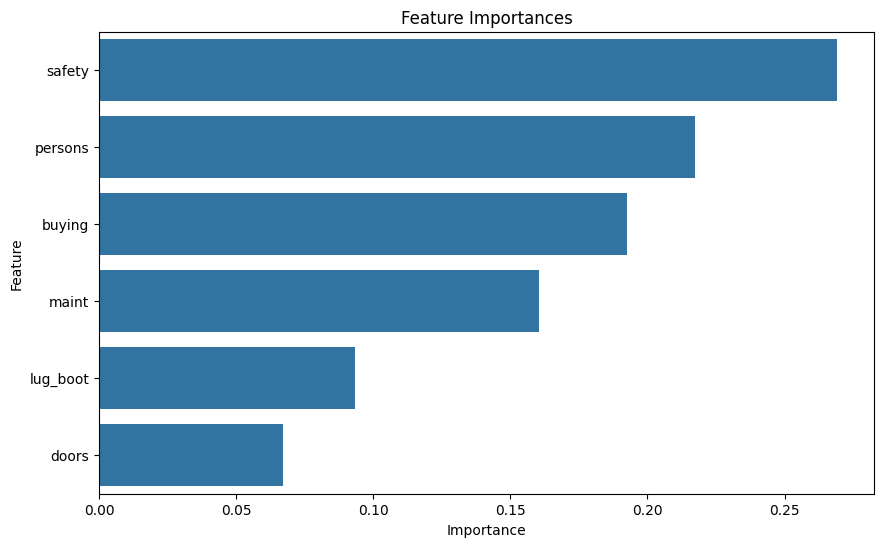

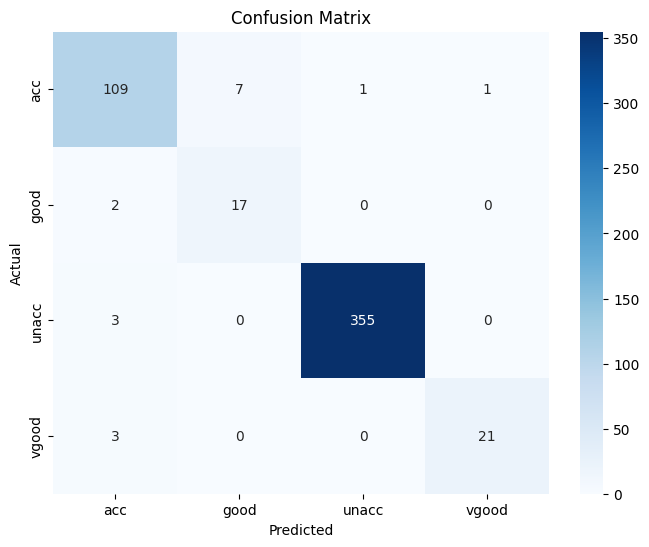

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset from the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(car_data.head())

# Encode categorical features
label_encoders = {}
for column in car_data.columns:
    label_encoders[column] = LabelEncoder()
    car_data[column] = label_encoders[column].fit_transform(car_data[column])

# Split the data into features and target
X = car_data.drop('class', axis=1)
y = car_data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Display feature importances
importances = rfc.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()